<a href="https://www.kaggle.com/code/dishaasinghi/spaceship-titanic-eda-decision-tree?scriptVersionId=129160512" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


<br>
<h1 style = "font-size:60px; font-family:cursive; font-weight : bold; background-color: #f1f5f8 ; color : #808000; text-align: center; border-radius: 120px 120px;">Spaceship Titanic</h1>
<br>

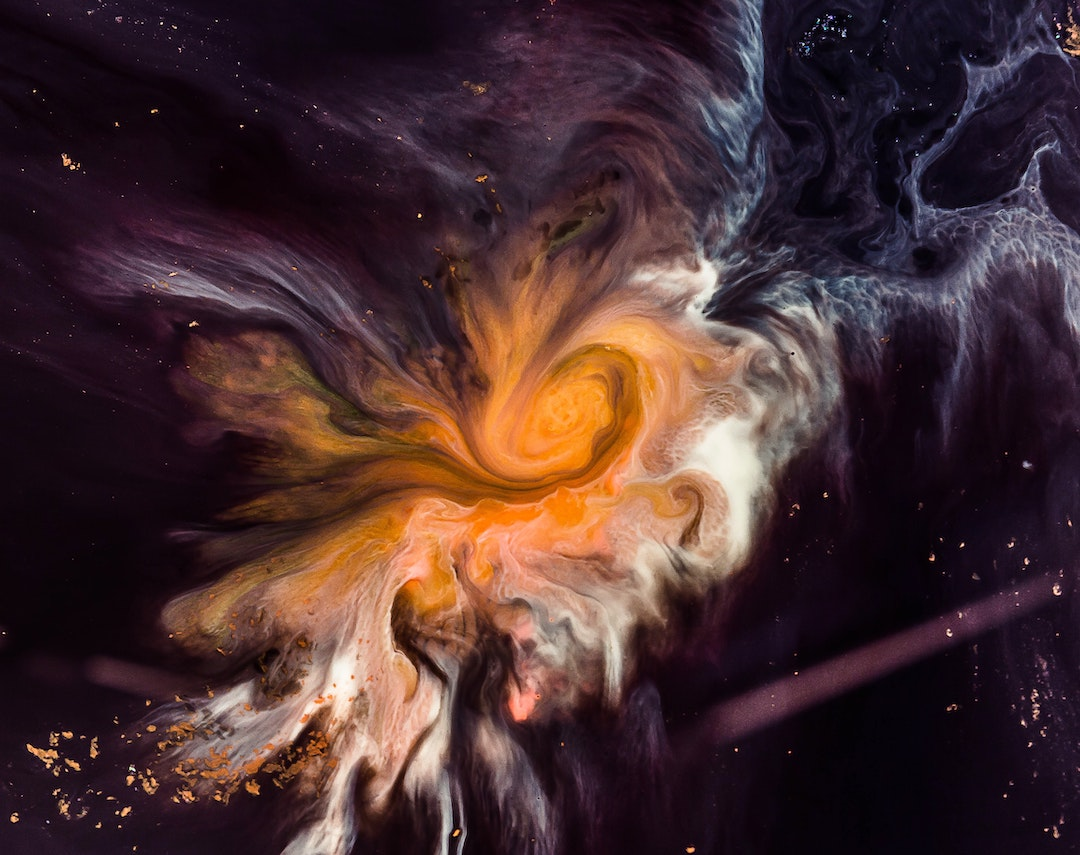

<br>
<h1 style = "font-size:50px; font-family:cursive ; font-weight : small; background-color: #f1f5f8 ; color : #808000; text-align: center; border-radius: 120px 120px;">Table of Contents</h1>
<br>

* [Introduction](#section-zero)
* [Importing Python Libraries](#section-one)
* [Working with Data](#section-two)
    - [Reading the Data](#subsection-one)
    - [Missing/Null Values](#subsection-two)
    - [Data Visualizations](#subsection-three)
* [Feature Selection](#section-three)
    - [Fitting the Model](#subsection-four)
    - [Model Selection](#subsection-five)
    - [Decision Tree](#subsection-six)
* [Submission](#section-four)

<a id="section-zero"></a>
<br>
<h1 style = "font-size:50px; font-family:Cursive ; font-weight : medium; background-color: #f1f5f8 ; color : #808000; text-align: center; border-radius: 120px 120px;">Introduction</h1>
<br>

<a id="section-zero"></a>
<br>
<h1 style = "font-size:30px; font-family:Cursive ; font-weight : medium; background-color: #f1f5f8 ; color : #f1j837; text-align: left; border-radius: 120px 120px;">What is Spaceship Titanic?</h1>
<br>

> The ***Spaceship Titanic*** was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

<a id="section-zero"></a>
<br>
<h1 style = "font-size:30px; font-family:Cursive ; font-weight : medium; background-color: #f1f5f8 ; color : #f1j837; text-align: left; border-radius: 120px 120px;">What is our Job?</h1>
<br>

> In this competition our task is to predict ***whether a passenger was transported*** to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly.

<a id="section-zero"></a>
<br>
<h1 style = "font-size:30px; font-family:Cursive ; font-weight : medium; background-color: #f1f5f8 ; color : #f1j837; text-align: left; border-radius: 120px 120px;">What are the Data we are provided with?</h1>
<br>

> ***PassengerId*** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
> 
> ***HomePlanet*** - The planet the passenger departed from, typically their planet of permanent residence.
> 
> ***CryoSleep*** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
> 
> ***Cabin*** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
> 
> ***Destination*** - The planet the passenger will be debarking to.
> 
> ***Age*** - The age of the passenger.
> 
> ***VIP*** - Whether the passenger has paid for special VIP service during the voyage.
> 
> ***RoomService, FoodCourt, ShoppingMall, Spa, VRDeck*** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
> 
> ***Name*** - The first and last names of the passenger.
> 
> ***Transported*** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

<a id="section-one"></a>
<br>
<h1 style = "font-size:50px; font-family:cursive ; font-weight : medium; background-color: #f1f5f8 ; color : #808000; text-align: center; border-radius: 120px 120px;">Importing Python Libraries</h1>
<br>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<a id="section-two"></a>
<br>
<h1 style = "font-size:50px; font-family:Cursive ; font-weight : medium; background-color: #f1f5f8 ; color : #808000; text-align: center; border-radius: 120px 120px;">Working with the Data</h1>
<br>

<a id="section-zero"></a>
<br>
<h1 style = "font-size:30px; font-family:Cursive ; font-weight : medium; background-color: #f1f5f8 ; color : #f1j837; text-align: left; border-radius: 120px 120px;">What changes/modifications are required for Data Cleaning?</h1>
<br>

> ***Reading and Analyzing the .csv files:*** Firstly, we will be going through the train and test datasets and checking for the important columns, the missing/null values and columns that are irrevalant to us.
> 
> ***Deleting Columns:*** As mentioned above, we need to drop the columns that are of no meaning. 
> 
>***Handling Null Values:*** We can either drop the null values using ***drop.na*** or fill the missing values using ***mean*** (for numerical data) or ***mode*** (for numerical/categorical data)

<a id="subsection-one"></a>
<br>
<h1 style = "font-size:40px; font-family:Cursive ; font-weight : small; background-color: #f1f5f8 ; color : #808000; text-align: center; border-radius: 120px 120px;">Reading and Analyzing the Files</h1>
<br>

In [3]:
df=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

In [4]:
data=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [5]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [7]:
df.shape

(8693, 14)

In [8]:
data.shape

(4277, 13)

<AxesSubplot: >

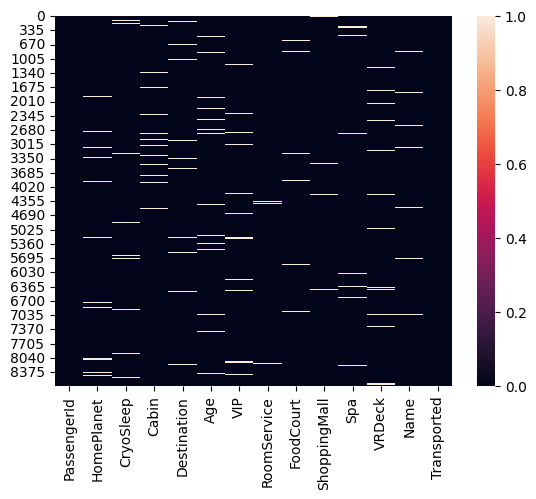

In [9]:
sns.heatmap(df.isnull())

<a id="subsection-two"></a>
<br>
<h1 style = "font-size:40px; font-family:Cursive ; font-weight : medium; background-color: #f1f5f8 ; color : #808000; text-align: center; border-radius: 120px 120px;"> Handling Missing Data </h1>
<br>

In [10]:
df.drop('PassengerId', axis=1)
df.drop('Name', axis=1, inplace=True)
data.drop('PassengerId', axis=1)
data.drop('Name', axis=1, inplace=True)

In [11]:
df['RoomService']=df['RoomService'].fillna(df['RoomService'].mean())
df['FoodCourt']=df['FoodCourt'].fillna(df['FoodCourt'].mean())
df['VRDeck']=df['VRDeck'].fillna(df['VRDeck'].mean())
df['VRDeck']=df['VRDeck'].fillna(df['VRDeck'].mean())
df['CryoSleep']=df['CryoSleep'].fillna(df['CryoSleep'].mode()[0])
df['HomePlanet']=df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])
df['Destination']=df['Destination'].fillna(df['Destination'].mode()[0])
df['Age']=df['Age'].fillna(df['Age'].mean())
df['VIP']=df['VIP'].fillna(df['VIP'].mode()[0])
df['ShoppingMall']=df['ShoppingMall'].fillna(df['ShoppingMall'].mean())
df['Spa']=df['Spa'].fillna(df['Spa'].mean())

In [12]:
data['RoomService']=data['RoomService'].fillna(data['RoomService'].mean())
data['FoodCourt']=data['FoodCourt'].fillna(data['FoodCourt'].mean())
data['VRDeck']=data['VRDeck'].fillna(data['VRDeck'].mean())
data['VRDeck']=data['VRDeck'].fillna(data['VRDeck'].mean())
data['CryoSleep']=data['CryoSleep'].fillna(data['CryoSleep'].mode()[0])
data['HomePlanet']=data['HomePlanet'].fillna(data['HomePlanet'].mode()[0])
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Destination']=data['Destination'].fillna(data['Destination'].mode()[0])
data['Age']=data['Age'].fillna(data['Age'].mean())
data['VIP']=data['VIP'].fillna(data['VIP'].mode()[0])
data['ShoppingMall']=data['ShoppingMall'].fillna(data['ShoppingMall'].mean())
data['Spa']=data['Spa'].fillna(data['Spa'].mean())

In [13]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [14]:
data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [15]:
new_df=pd.concat([df, data])

In [16]:
new_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [17]:
new_df.shape

(12970, 13)

<a id="subsection-three"></a>
<br>
<h1 style = "font-size:40px; font-family:Cursive ; font-weight : medium; background-color: #f1f5f8 ; color : #808000; text-align: center; border-radius: 120px 120px;"> Data Visualizations </h1>
<br>

/tmp/ipykernel_20/1116323468.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_df.corr(), annot=True)


<AxesSubplot: >

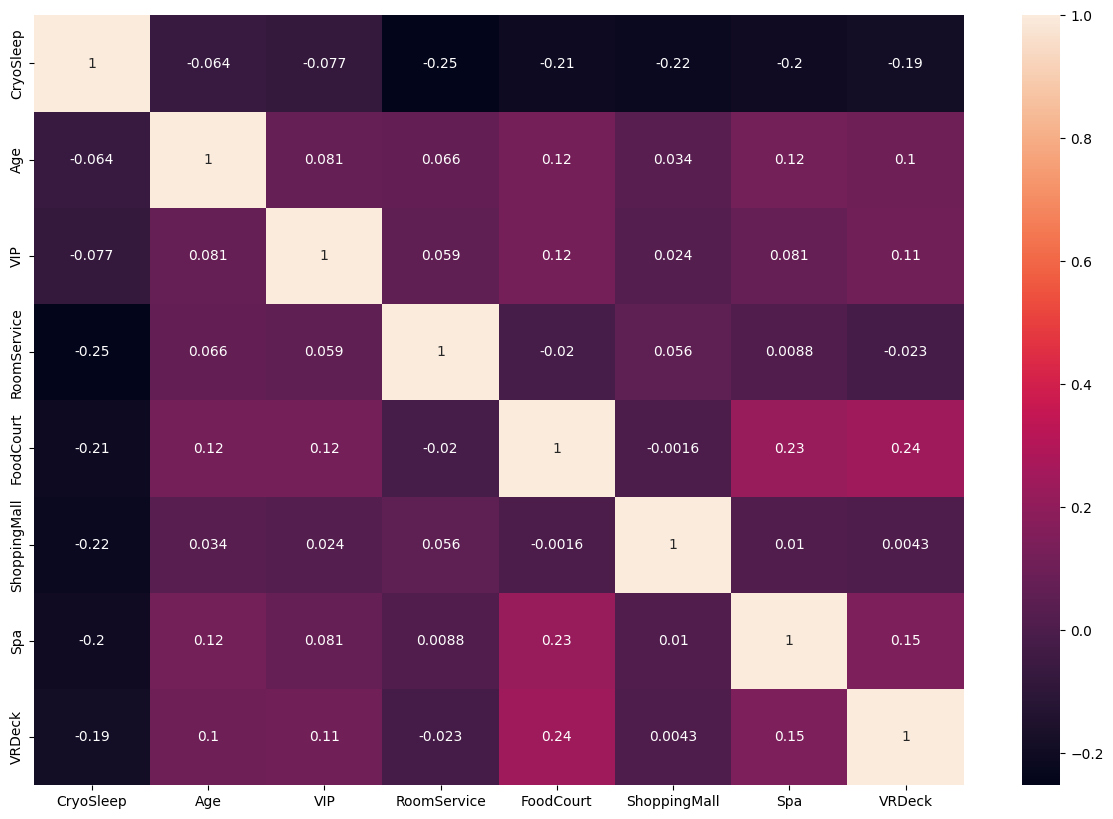

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(new_df.corr(), annot=True)

<AxesSubplot: xlabel='Age', ylabel='Count'>

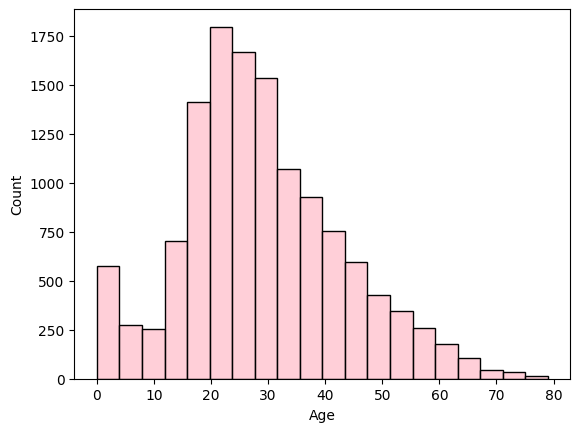

In [19]:
sns.histplot(data=new_df, x='Age', bins=20, color='pink')

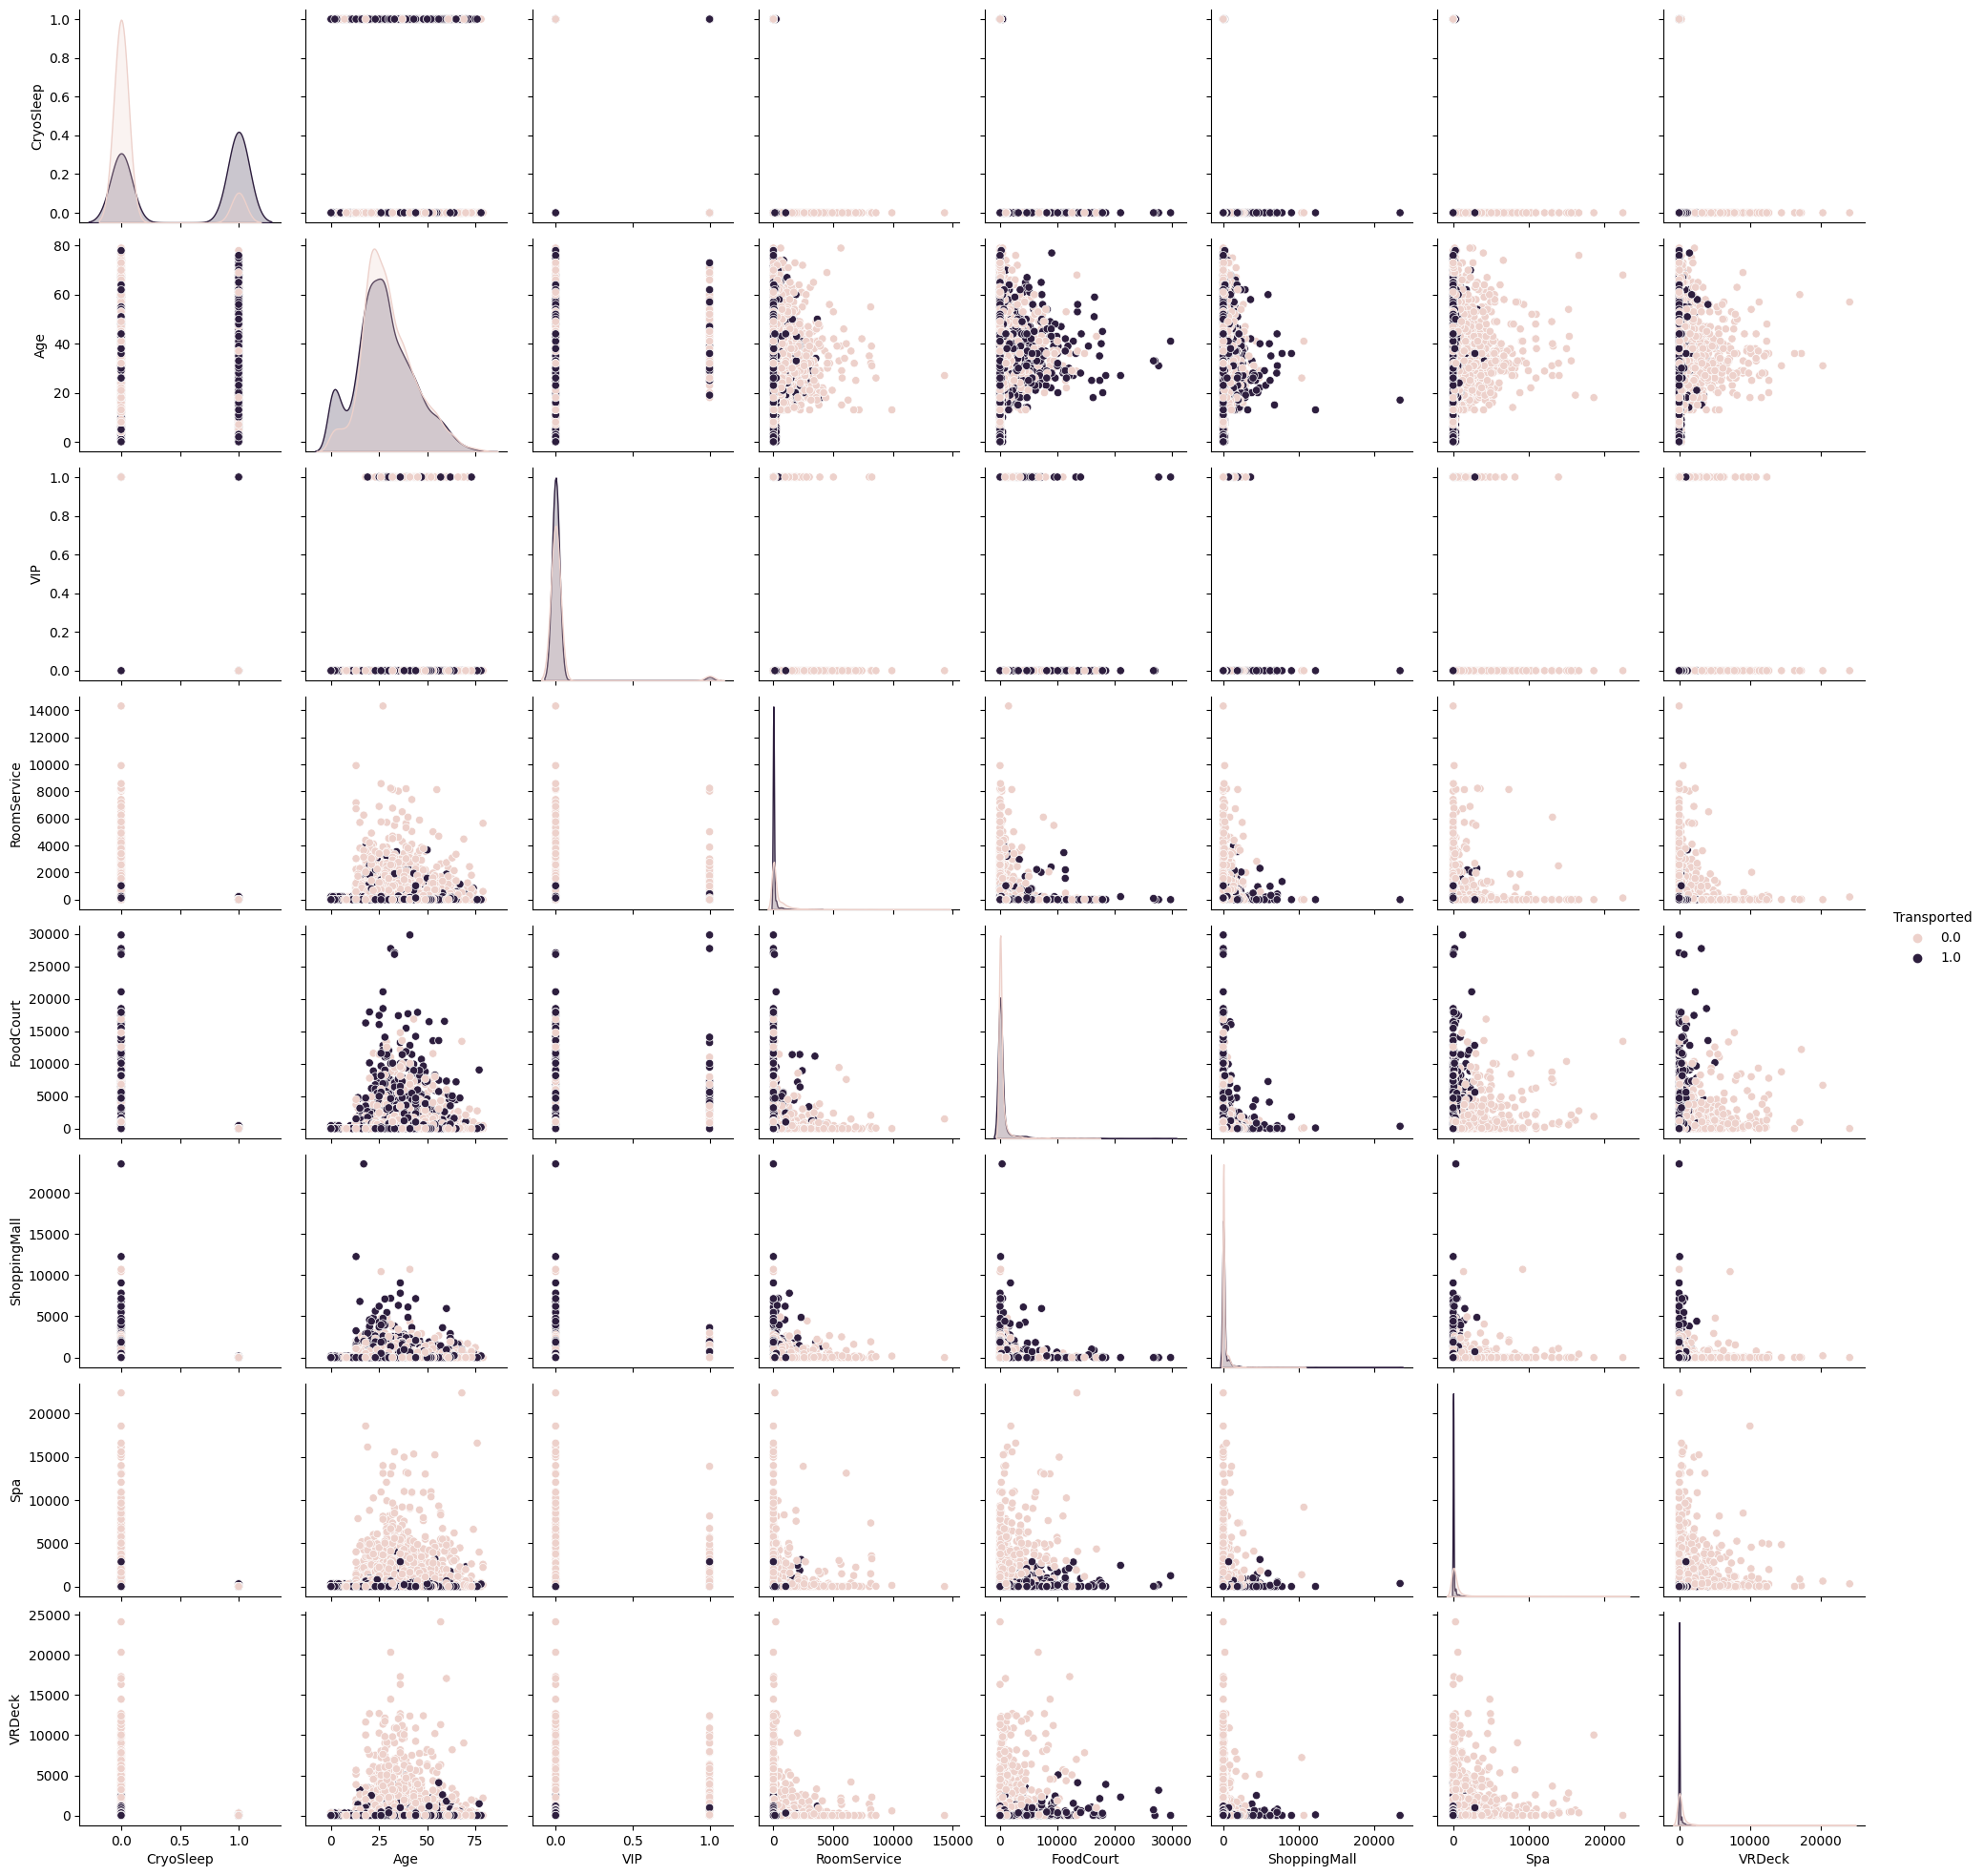

In [20]:
sns.pairplot(data=new_df, hue='Transported')

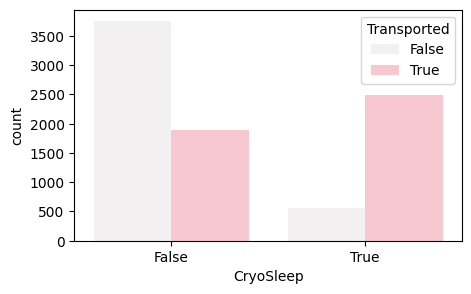

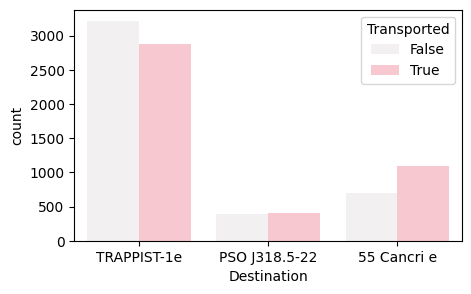

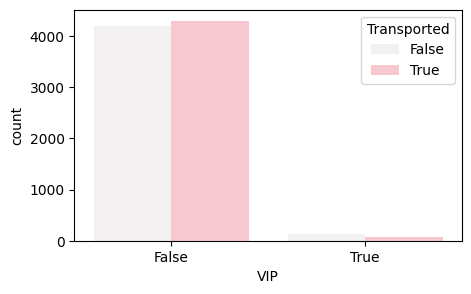

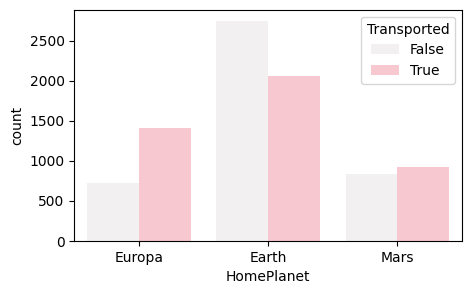

In [21]:
columns = ['CryoSleep', 'Destination', 'VIP', 'HomePlanet']
for col in columns:
    fig, ax = plt.subplots(figsize=(5, 3))
    sns.countplot(data=new_df, x=col, hue='Transported', ax=ax, color='pink')

<a id="section-three"></a>
<br>
<h1 style = "font-size:50px; font-family:Cursive ; font-weight : medium; background-color: #f1f5f8 ; color : #808000; text-align: center; border-radius: 120px 120px;">Feature Selection</h1>
<br>

In [22]:
df_test=new_df[new_df['Transported'].isnull()]
df_train=new_df[~new_df['Transported'].isnull()]

In [23]:
df.drop('Cabin', axis=1, inplace=True)
data.drop('Cabin', axis=1, inplace=True)

<a id="subsection-four"></a>
<br>
<h1 style = "font-size:40px; font-family:Cursive ; font-weight : medium; background-color: #f1f5f8 ; color : #808000; text-align: center; border-radius: 120px 120px;">Fitting the Model</h1>
<br>

<a id="subsection-four"></a>
<br>
<h1 style = "font-size:30px; font-family:Cursive ; font-weight : medium; background-color: #f1f5f8 ; color : #f1j837; text-align: left; border-radius: 120px 120px;">Explaining elements in Model Selection and Model Fitting</h1>
<br>

> ***X_train:*** This includes your all independent variables,these will be used to train the model, also as we have specified the test_size = 0.2, this means 80% of observations from your complete data will be used to train/fit the model and rest 20% will be used to test the model. Here, all the features other than 'Outcome' are independent features.
> 
> ***X_test:*** This is remaining 20% portion of the independent variables from the data which will not be used in the training phase and will be used to make predictions to test the accuracy of the model.
> 
> ***y_train:*** This is your dependent variable which needs to be predicted by this model, this includes category labels against your independent variables, we need to specify our dependent variable while training/fitting the model. Here the feature is 'Outcome' as mentioned above
> 
> ***y_test:*** This data has category labels for your test data, these labels will be used to test the accuracy between actual and predicted categories.

In [24]:
X=df_train.drop('Transported', axis=1)
y=df_train['Transported']
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.33,shuffle=True)

<a id="subsection-five"></a>
<br>
<h1 style = "font-size:40px; font-family:Cursive ; font-weight : medium; background-color: #f1f5f8 ; color : #808000; text-align: center; border-radius: 120px 120px;">Selecting Model - Decision Tree Classifier</h1>
<br>

<a id="subsection-six"></a>
<br>
<h1 style = "font-size:30px; font-family:Cursive ; font-weight : medium; background-color: #f1f5f8 ; color : #f1j837; text-align: left; border-radius: 120px 120px;">What is a Decision Tree Classifier?</h1>
<br>

> ***Decision Tree*** is a Supervised Machine Learning Algorithm that uses a set of rules to make decisions, similarly to how humans make decisions.
> 
> The intuition behind ***Decision Trees*** is that you use the dataset features to create yes/no questions and continually ***split the dataset*** until you isolate all data points belonging to each class.
> 
> The first node is called the ***root node***. The result of asking a question splits the dataset based on the value of a feature, and creates new nodes. If we decide to stop the process after a split, the ***last nodes created are called leaf nodes***.

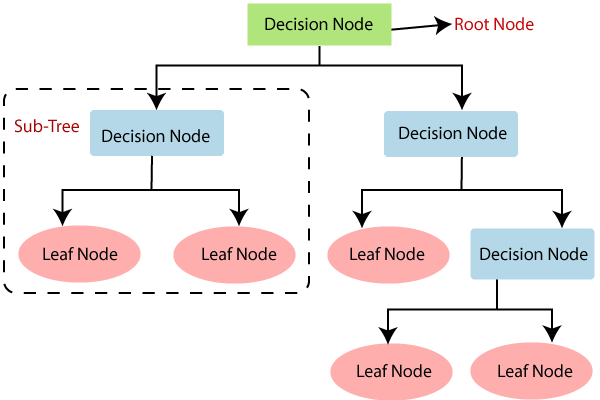


> The goal is to continue to ***splitting the feature space***, and applying rules, until we don’t have any more rules to apply or no data points left. Then, it’s time to assign a class to all data points in each leaf node.

For more information, you may refer to this [article](https://towardsdatascience.com/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575)

In [25]:
from sklearn.tree import DecisionTreeClassifier
y = df["Transported"]
features = ["Destination", "CryoSleep", "HomePlanet", "VIP"]
X = pd.get_dummies(df[features])
X_test = pd.get_dummies(data[features])
model=DecisionTreeClassifier(max_depth=7)
model.fit(X,y)

DecisionTreeClassifier(max_depth=7)

In [26]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')

[Text(0.5724431818181818, 0.9285714285714286, 'x[0] <= 0.5\ngini = 0.5\nsamples = 8693\nvalue = [4315, 4378]'),
 Text(0.34375, 0.7857142857142857, 'x[6] <= 0.5\ngini = 0.446\nsamples = 5656\nvalue = [3761, 1895]'),
 Text(0.23295454545454544, 0.6428571428571429, 'x[2] <= 0.5\ngini = 0.431\nsamples = 4436\nvalue = [3044, 1392]'),
 Text(0.14772727272727273, 0.5, 'x[1] <= 0.5\ngini = 0.421\nsamples = 3820\nvalue = [2668, 1152]'),
 Text(0.09090909090909091, 0.35714285714285715, 'x[5] <= 0.5\ngini = 0.423\nsamples = 3754\nvalue = [2612, 1142]'),
 Text(0.045454545454545456, 0.21428571428571427, 'x[3] <= 0.5\ngini = 0.404\nsamples = 910\nvalue = [654, 256]'),
 Text(0.022727272727272728, 0.07142857142857142, 'gini = 0.403\nsamples = 880\nvalue = [634, 246]'),
 Text(0.06818181818181818, 0.07142857142857142, 'gini = 0.444\nsamples = 30\nvalue = [20, 10]'),
 Text(0.13636363636363635, 0.21428571428571427, 'x[4] <= 0.5\ngini = 0.429\nsamples = 2844\nvalue = [1958, 886]'),
 Text(0.11363636363636363, 

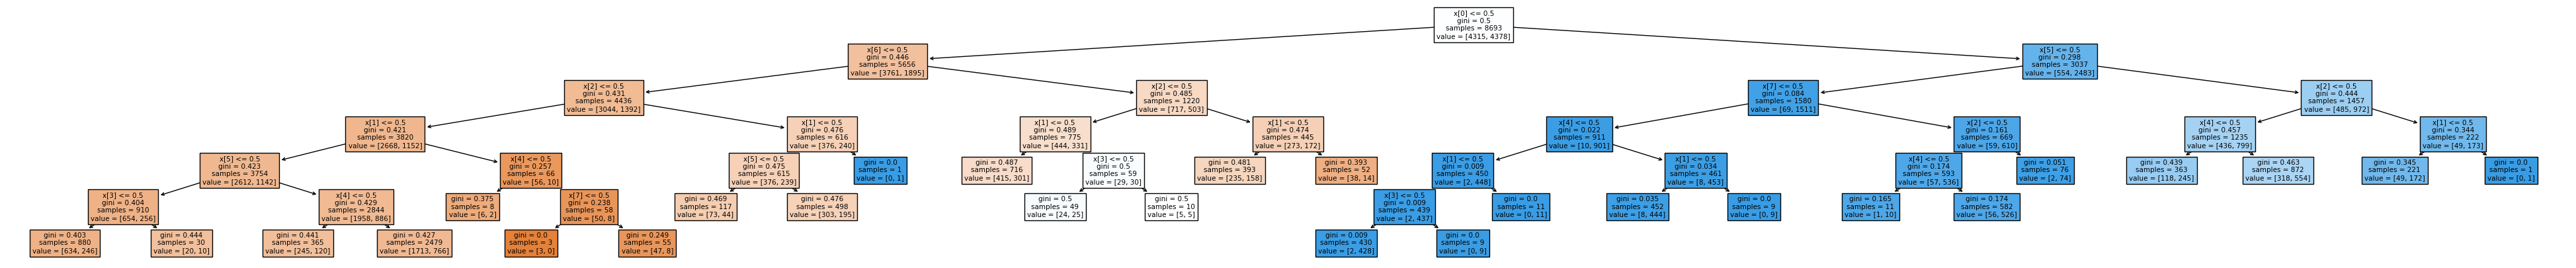

In [27]:
from sklearn import tree
plt.figure(figsize=(50,5))
tree.plot_tree(model, filled=True)

In [28]:
y_pred=model.predict(X_test)

<a id="section-four"></a>
<br>
<h1 style = "font-size:50px; font-family:Cursive; font-weight : medium; background-color: #f1f5f8 ; color : #808000; text-align: center; border-radius: 120px 120px;">Submitting the Predictions</h1>
<br>

In [29]:
output = pd.DataFrame({'PassengerId': data.PassengerId, 'Transported': y_pred})
output.to_csv('submission.csv', index=False)
print("Submission successful!")

Submission successful!
